# Satellite data: channels IR039 and IR108 (infrared 3.92 and 10.8 µm)

The aim of this notebook is to show how to read the infrared channels satellite data from a data sample. 

You will find one NetCDF file per geographic zone ('NW' for North-West of France and 'SE' for South-East of France) and per year. 

The satellites emit signals at different wavelengths and capture signals reflected and/or re-emitted by the clouds or by the earth surface in clear skies. A channel means a range of wavelenghts : visible, infrared... 

About infrared channels, for each pixel, the value represents the brightness temperature (in °C) of the target (clouds or ground, sea if there are no cloud), in the infrared domain.  

The spatial resolution is 0.03° and the time step is 1 hour but some dates can be missing (due to problems in original data, so we can do anything).

For more information, cf documentation.

In [1]:
import xarray as xr 
from meteonet_toolbox.constant import ir_palette
from matplotlib import colors
%matplotlib notebook
import matplotlib.pyplot as plt
import datetime

## Parameters definition

Select the area and year you want to study:

In [2]:
zone = 'SE'
year = '2016'

## Loading data using parameters

In [3]:
channel = 'IR108'   #channel name : IR039 or IR108
fname = "../../data_samples/satellite/"+ channel + "_%s_%s.nc" % (zone,year) #it is about a data sample : the first day in 2016 in SE zone
data = xr.open_dataset(fname)

## Quick field visualisation 

The following command shows the satellite data on a given zone at different dates (dates indexes : 1,10,20 and 23).

<IPython.core.display.Javascript object>


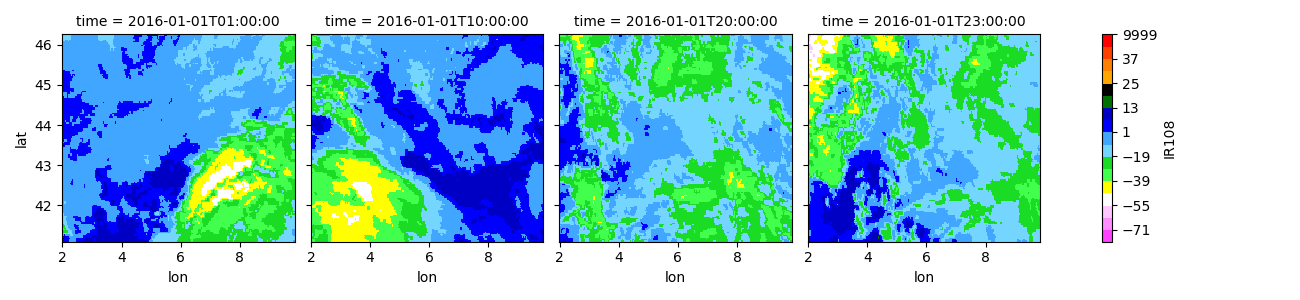

In [4]:
#get the color palette information (a color palette from the intern forecasting tool)
palette_name = "IR_palette.json"  
bounds, c = ir_palette(palette_name)  
cmap = colors.ListedColormap(c)
norm = colors.BoundaryNorm(bounds, cmap.N)

data.isel(time=[1,10,20,23])[channel].plot(x='lon', y='lat',col='time',cmap=cmap, norm=norm) 
plt.show()

## Exploration of metadata

Overview of the data:

In [5]:
data

<xarray.Dataset>
Dimensions:  (lat: 171, lon: 261, time: 24)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2016-01-01T23:00:00
  * lat      (lat) float64 46.25 46.22 46.19 46.16 ... 41.19 41.16 41.13 41.1
  * lon      (lon) float64 2.0 2.03 2.06 2.09 2.121 ... 9.752 9.782 9.812 9.842
Data variables:
    IR108    (time, lat, lon) float32 ...
Attributes:
    creating_function:   create_nc_file
    appending_function:  append_unlimited_dim_nc_file

Get the information about coordinates (latitude and longitude). It is in degrees (north degrees about latitude and east degrees about longitude).

In [6]:
coord = 'lon'
data[coord]

<xarray.DataArray 'lon' (lon: 261)>
array([2.      , 2.030162, 2.060323, ..., 9.781677, 9.811838, 9.842   ])
Coordinates:
  * lon      (lon) float64 2.0 2.03 2.06 2.09 2.121 ... 9.752 9.782 9.812 9.842

Get the information about the observation times:

In [7]:
dates = data['time']
dates

<xarray.DataArray 'time' (time: 24)>
array(['2016-01-01T00:00:00.000000000', '2016-01-01T01:00:00.000000000',
       '2016-01-01T02:00:00.000000000', '2016-01-01T03:00:00.000000000',
       '2016-01-01T04:00:00.000000000', '2016-01-01T05:00:00.000000000',
       '2016-01-01T06:00:00.000000000', '2016-01-01T07:00:00.000000000',
       '2016-01-01T08:00:00.000000000', '2016-01-01T09:00:00.000000000',
       '2016-01-01T10:00:00.000000000', '2016-01-01T11:00:00.000000000',
       '2016-01-01T12:00:00.000000000', '2016-01-01T13:00:00.000000000',
       '2016-01-01T14:00:00.000000000', '2016-01-01T15:00:00.000000000',
       '2016-01-01T16:00:00.000000000', '2016-01-01T17:00:00.000000000',
       '2016-01-01T18:00:00.000000000', '2016-01-01T19:00:00.000000000',
       '2016-01-01T20:00:00.000000000', '2016-01-01T21:00:00.000000000',
       '2016-01-01T22:00:00.000000000', '2016-01-01T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2016-01-01T23:00:00

Get the information about the visible satellite data:

In [8]:
d = data[channel]
d_vals = d.values  #get the values 
d

<xarray.DataArray 'IR108' (time: 24, lat: 171, lon: 261)>
array([[[ -5.2 ,  -9.83, ..., -28.42, -27.98],
        [ -5.2 ,  -9.83, ..., -24.28, -26.43],
        ...,
        [  2.32,   2.47, ...,  -6.54,  -6.54],
        [  2.32,   2.47, ...,  -6.71,  -7.05]],

       [[-12.88, -12.33, ..., -14.73, -17.39],
        [-12.88, -12.33, ..., -18.37, -20.96],
        ...,
        [  2.01,   3.54, ...,  -9.65,  -9.65],
        [  2.01,   3.54, ..., -10.54,  -8.78]],

       ...,

       [[-45.22, -44.64, ...,  -8.08,  -6.88],
        [-45.22, -44.64, ...,  -7.22,  -6.04],
        ...,
        [  3.85,   4.15, ..., -16.24, -16.24],
        [  3.85,   4.15, ..., -16.82, -17.98]],

       [[-55.8 , -55.44, ..., -13.99, -12.88],
        [-55.8 , -55.44, ..., -13.8 , -13.25],
        ...,
        [  5.94,   5.94, ..., -14.17, -14.17],
        [  5.94,   5.94, ..., -15.29, -11.61]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 ... 2016-01-01T23:00:00
  * lat      (lat) float64 46.25 46.22 46.19 46.16 ... 41.19 41.16 41.13 41.1
  * lon      (lon) float64 2.0 2.03 2.06 2.09 2.121 ... 9.752 9.782 9.812 9.842
Attributes:
    Description:  Brightness temperature (in °C)

The structure of the data (3 dimensions):
* number of observation times
* number of points in latitude 
* number of points in longitude

In [9]:
d_vals.shape

(24, 171, 261)

## Plotting data with Cartopy

Plot the data for one given date with Cartopy:

In [10]:
from meteonet_toolbox.constant import DOMAINS
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [11]:
#studied date
studied_date = '201601011200'
date = datetime.datetime.strptime(studied_date,'%Y%m%d%H%M')

In [12]:
#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude
extent = [lllon, urlon, lllat, urlat]

<IPython.core.display.Javascript object>


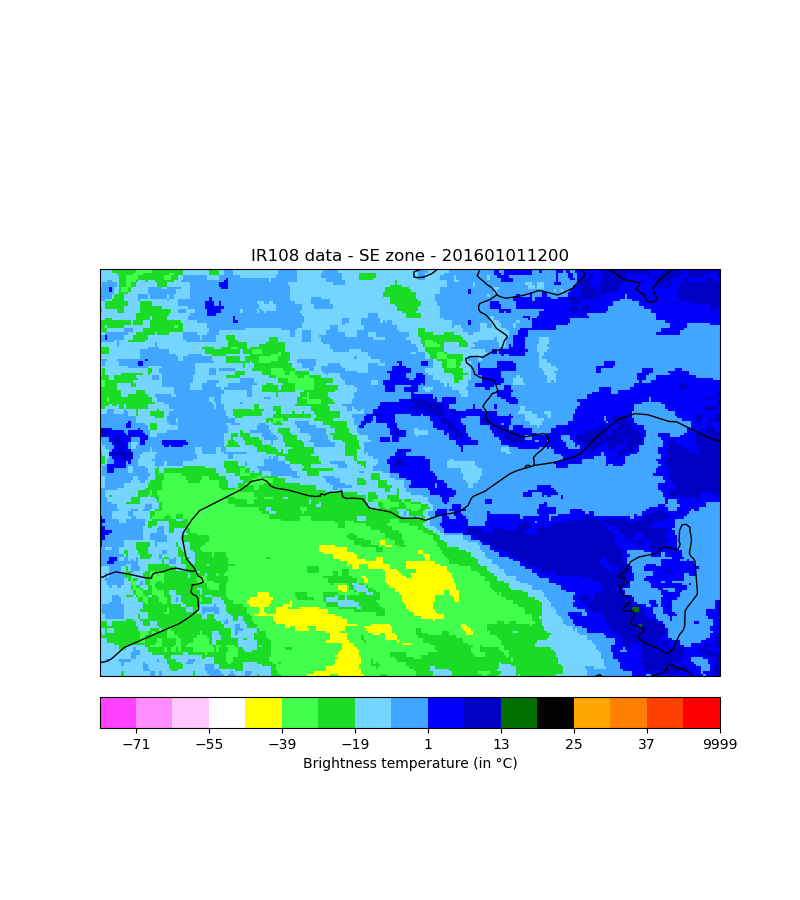

In [13]:
fig = plt.figure(figsize=(8,9))

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

img = plt.imshow(data.sel(time=date)[channel], interpolation='none', origin='upper',cmap=cmap, norm=norm, extent=extent)

# Add coastlines and borders
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Show only the area we defined
ax.set_extent(extent)

plt.colorbar(img, orientation= 'horizontal', pad=0.03).set_label(data[channel].Description)
plt.title(channel + ' data - '+ zone + ' zone - '+ studied_date)
plt.show()